In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
df = pd.read_csv(f"processed data/rb_proc_data.csv")

In [4]:
df = df[df["Rookie"] == 0]

In [5]:
df

,pid,Player,Season,AVG,FPTS_TG,FPTS/G_MISC_avg,ATT_RUSHING/G_avg,YDS_RUSHING/G_avg,TD_RUSHING/G_avg,REC_RECEIVING/G_avg,...,TD_RECEIVING/G_ewm,FL_MISC/G_ewm,YDS/ATT_RUSHING_ewm,TD/ATT_RUSHING_ewm,YDS/REC_RECEIVING_ewm,YDS/TGT_RECEIVING_ewm,REC/TGT_RECEIVING_ewm,TD/TGT_RECEIVING_ewm,Rookie,Career_Years
0,13912,Todd Gurley II (FA),2018,1.0,24.5,16.533333,17.863462,75.796474,0.670299,2.856517,...,0.181233,0.097861,4.233283,0.037919,10.043008,7.548106,0.753798,0.031247,0,3
2,16393,Christian McCaffrey (SF),2018,15.0,20.8,11.800000,7.312500,27.187500,0.125000,5.000000,...,0.312500,0.062500,3.717949,0.017094,8.137500,5.761062,0.707965,0.044248,0,1
3,16421,Alvin Kamara (NO),2018,6.5,20.9,17.100000,7.500000,45.500000,0.500000,5.062500,...,0.312500,0.062500,6.066667,0.066667,10.197531,8.260000,0.810000,0.050000,0,1
4,15498,Ezekiel Elliott (FA),2018,3.5,19.4,19.800000,22.833333,103.516667,0.850000,2.366667,...,0.144772,0.086193,4.477537,0.036240,10.759372,7.905739,0.732172,0.041186,0,2
5,16447,James Conner (ARI),2018,189.5,19.4,1.000000,2.285714,10.285714,0.000000,0.000000,...,0.000000,0.000000,4.500000,0.000000,NaN,0.000000,0.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,22739,Javonte Williams (DEN),2022,23.0,8.5,10.800000,11.941176,53.117647,0.235294,2.529412,...,0.176471,0.058824,4.448276,0.019704,7.348837,5.962264,0.811321,0.056604,0,1
505,17309,Sony Michel (FA),2022,195.5,2.0,8.900000,13.131874,57.052539,0.311361,0.825383,...,0.053655,0.045797,4.491985,0.020503,9.393291,6.557893,0.668314,0.042517,0,4
506,17514,Darrel Williams (FA),2022,203.5,3.8,5.075000,4.122855,15.617341,0.166360,1.409926,...,0.085228,0.016272,3.848728,0.037640,8.951824,7.201889,0.797705,0.069489,0,4
507,17243,Ronald Jones II (DAL),2022,164.0,3.1,7.125000,8.438294,37.132341,0.313194,1.345486,...,0.019724,0.115927,4.147549,0.038349,6.723853,5.022087,0.743215,0.006575,0,4


In [6]:
df.Season.value_counts()

2018    96
2021    95
2019    86
2020    84
2022    59
Name: Season, dtype: int64

In [7]:
corrs = df.corr()

In [8]:
rel_cols = ["Season"]
for i, vals in corrs[["FPTS_TG"]].iterrows():
    val = vals["FPTS_TG"]
    if (val > 0.4 or val < -0.4) and "_ls" not in i:
        rel_cols.append(i)

In [9]:
rel_df = df[rel_cols]

In [10]:
for col in rel_cols[2:]:
    new_c = rel_df[col]/rel_df["AVG"]
    
    new_name = col+"_ADP"
    
    rel_df[new_name] = new_c

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
corrs = rel_df.corr()

In [12]:
corrs[["FPTS_TG"]]

,FPTS_TG
Season,0.096831
AVG,-0.722483
FPTS_TG,1.000000
FPTS/G_MISC_avg,0.630329
ATT_RUSHING/G_avg,0.513072
YDS_RUSHING/G_avg,0.552374
TD_RUSHING/G_avg,0.548074
REC_RECEIVING/G_avg,0.463451
TGT_RECEIVING/G_avg,0.456206
YDS_RECEIVING/G_avg,0.479337


In [13]:
rel_df = df[rel_cols]

In [14]:
for col in rel_df.columns[2:]:
    if "FPTS" not in col:
        if "_avg" in col:
            new_c = rel_df["FPTS/G_MISC_avg"]*rel_df[col]
        elif "_ewm" in col:
            new_c = rel_df["FPTS/G_MISC_ewm"]*rel_df[col]
        
        new_name = col+"_FP"

        rel_df[new_name] = new_c

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
corrs = rel_df.corr()

In [16]:
corrs[["FPTS_TG"]]#.tail(30)

,FPTS_TG
Season,0.096831
AVG,-0.722483
FPTS_TG,1.000000
FPTS/G_MISC_avg,0.630329
ATT_RUSHING/G_avg,0.513072
YDS_RUSHING/G_avg,0.552374
TD_RUSHING/G_avg,0.548074
REC_RECEIVING/G_avg,0.463451
TGT_RECEIVING/G_avg,0.456206
YDS_RECEIVING/G_avg,0.479337


In [17]:
model_cols = ["Season"]
for i, vals in corrs[["FPTS_TG"]].iterrows():
    val = vals["FPTS_TG"]
    if val > 0.55 or val < -0.55:
        model_cols.append(i)

In [18]:
import pickle
with open("rb_feats", "wb") as fp:   #Pickling
    pickle.dump(model_cols, fp)

In [19]:
model_cols

['Season',
 'AVG',
 'FPTS_TG',
 'FPTS/G_MISC_avg',
 'YDS_RUSHING/G_avg',
 'FPTS/G_MISC_ewm',
 'YDS_RUSHING/G_ewm',
 'TD_RUSHING/G_ewm',
 'ATT_RUSHING/G_avg_FP',
 'YDS_RUSHING/G_avg_FP',
 'TD_RUSHING/G_avg_FP',
 'REC_RECEIVING/G_avg_FP',
 'TGT_RECEIVING/G_avg_FP',
 'YDS_RECEIVING/G_avg_FP',
 'ATT_RUSHING/G_ewm_FP',
 'YDS_RUSHING/G_ewm_FP',
 'TD_RUSHING/G_ewm_FP',
 'REC_RECEIVING/G_ewm_FP',
 'TGT_RECEIVING/G_ewm_FP',
 'YDS_RECEIVING/G_ewm_FP']

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
model_df = rel_df[model_cols]

In [48]:
model_df.columns

Index(['Season', 'AVG', 'FPTS_TG', 'FPTS/G_MISC_avg', 'YDS_RUSHING/G_avg',
       'FPTS/G_MISC_ewm', 'YDS_RUSHING/G_ewm', 'TD_RUSHING/G_ewm',
       'ATT_RUSHING/G_avg_FP', 'YDS_RUSHING/G_avg_FP', 'TD_RUSHING/G_avg_FP',
       'REC_RECEIVING/G_avg_FP', 'TGT_RECEIVING/G_avg_FP',
       'YDS_RECEIVING/G_avg_FP', 'ATT_RUSHING/G_ewm_FP',
       'YDS_RUSHING/G_ewm_FP', 'TD_RUSHING/G_ewm_FP', 'REC_RECEIVING/G_ewm_FP',
       'TGT_RECEIVING/G_ewm_FP', 'YDS_RECEIVING/G_ewm_FP'],
      dtype='object')

/home/sergio/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AVG', ylabel='FPTS_TG'>

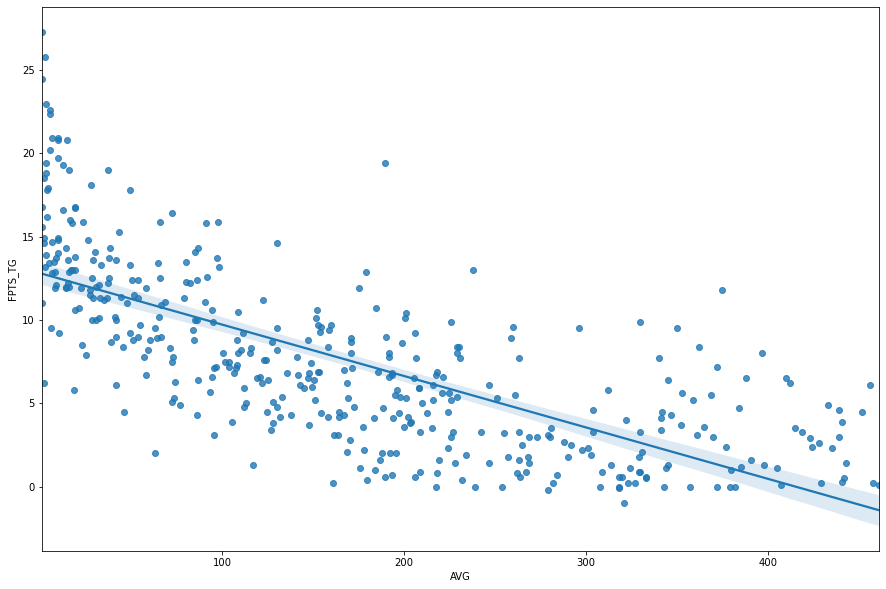

In [23]:
plt.figure(figsize=(15, 10))
sns.regplot(model_df["AVG"], model_df["FPTS_TG"])

In [24]:
#plt.figure(figsize=(15, 10))
#sns.regplot(model_df["FPTS_TG"], model_df["REC_RECEIVING_avg_FP"])

In [25]:

plt.figure(figsize=(15, 10))
#sns.regplot(model_df["FPTS_TG"], model_df["REC_RECEIVING/G_ls_FP"])

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [26]:
model_df = model_df.fillna(0)

In [27]:
# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [29]:
X = model_df.drop(["FPTS_TG", "Season"], axis=1)
y = model_df[["FPTS_TG"]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression()

In [31]:
sc = preprocessing.StandardScaler()

In [32]:
X_train_sc = sc.fit_transform(X_train)

In [33]:
X_test_sc = sc.transform(X_test)

In [34]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test_sc)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(y_test, y_pred)

2.9354905366322517

In [38]:
mean_squared_error(y_test, y_pred)

14.558611692568974

In [39]:
r2_score(y_test, y_pred)

0.5576813121504758

In [40]:
y_test

,FPTS_TG
149,9.0
415,3.7
24,10.6
117,25.8
157,8.0
...,...
311,4.8
379,5.4
92,0.5
78,3.0


In [41]:
y_pred

array([[ 6.19613206],
       [ 2.42818144],
       [ 6.73288487],
       [16.12325187],
       [ 7.36090182],
       [ 2.67330595],
       [ 8.01851894],
       [ 2.56517002],
       [12.18345732],
       [ 5.80535679],
       [ 0.34338899],
       [ 6.83947106],
       [11.94362269],
       [19.99885571],
       [ 6.97166332],
       [15.1210162 ],
       [ 2.18057074],
       [11.84540833],
       [ 5.89092423],
       [ 3.58438084],
       [ 9.22031391],
       [ 9.25246237],
       [12.31945323],
       [ 4.23261196],
       [18.15169062],
       [ 5.13718326],
       [ 7.73317515],
       [ 6.61281438],
       [ 8.39121708],
       [12.41518758],
       [ 6.20515444],
       [ 3.32311649],
       [12.00069274],
       [10.54694901],
       [ 9.65858308],
       [ 9.08288156],
       [10.29915185],
       [ 5.9972469 ],
       [ 9.60576642],
       [ 7.41380162],
       [ 5.39538148],
       [ 6.21611285],
       [ 6.63230003],
       [10.92667007],
       [ 7.01165471],
       [11

In [42]:
X_22 = model_df[model_df.Season == 2022].drop(["FPTS_TG", "Season"], axis=1)

In [43]:
#df[df.Season == 2022]

In [44]:
mdd = df[df.Season == 2022][["FPTS_TG", "Player"]].copy()

In [45]:
mdd["comp"] = lr.predict(sc.transform(X_22))

In [46]:
mdd

,FPTS_TG,Player,comp
440,18.8,Austin Ekeler (LAC),14.524097
441,18.5,Christian McCaffrey (SF),18.151691
442,17.8,Josh Jacobs (LV),10.926670
443,17.9,Derrick Henry (TEN),19.041686
444,15.8,Nick Chubb (CLE),14.694102
445,16.0,Saquon Barkley (NYG),8.327681
446,14.3,Tony Pollard (DAL),9.620532
447,12.9,Jamaal Williams (NO),6.958574
448,12.9,Aaron Jones (GB),14.347314
449,12.8,Dalvin Cook (FA),14.816034


In [63]:
#from sklearn.tree import RandomForestRegressor


In [312]:
svm = SVR(kernel='rbf')
svm.fit(X_train_sc,y_train)

SVR()

In [313]:
y_pred = svm.predict(X_test_sc)

In [314]:
X

,AVG,FPTS/G_MISC_avg,FPTS_MISC_avg,FPTS/G_MISC_ewm,FPTS_MISC_ewm,FPTS/G_MISC_ls,FPTS_MISC_ls,REC_RECEIVING_avg_FP,TGT_RECEIVING_avg_FP,YDS_RECEIVING_avg_FP,...,TGT_RECEIVING/G_ewm_FP,YDS_RECEIVING/G_ewm_FP,REC_RECEIVING_ls_FP,TGT_RECEIVING_ls_FP,YDS_RECEIVING_ls_FP,FPTS/G_MISC_ls_FP,FPTS_MISC_ls_FP,REC_RECEIVING/G_ls_FP,TGT_RECEIVING/G_ls_FP,YDS_RECEIVING/G_ls_FP
0,1.0,16.533333,242.033333,17.569687,260.656065,23.40,351.3,10326.755556,13795.900000,105123.144444,...,1105.787481,8764.752903,22483.2,30563.1,276824.4,276824.4,276824.4,1498.880000,2037.540000,18454.960000
2,15.0,11.800000,188.600000,11.800000,188.600000,11.80,188.6,15088.000000,21311.800000,122778.600000,...,1331.987500,7673.662500,15088.0,21311.8,122778.6,122778.6,122778.6,943.000000,1331.987500,7673.662500
3,6.5,17.100000,273.900000,17.100000,273.900000,17.10,273.9,22185.900000,27390.000000,226241.400000,...,1711.875000,14140.087500,22185.9,27390.0,226241.4,226241.4,226241.4,1386.618750,1711.875000,14140.087500
4,3.5,19.800000,249.800000,19.662742,239.574257,19.00,190.2,7244.200000,9742.200000,78936.800000,...,797.915948,6176.613256,4945.2,7227.6,51163.8,51163.8,51163.8,494.520000,722.760000,5116.380000
5,189.5,1.000000,14.400000,1.000000,14.400000,1.00,14.4,0.000000,14.400000,0.000000,...,1.028571,0.000000,0.0,14.4,0.0,0.0,0.0,0.000000,1.028571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,458.0,2.150000,32.200000,2.415938,36.780996,3.70,58.9,724.500000,949.900000,6101.900000,...,81.527282,520.751905,2356.0,3121.7,20556.1,20556.1,20556.1,147.250000,195.106250,1284.756250
1239,290.0,3.366667,51.033333,3.159912,47.980700,3.60,58.2,1207.788889,1769.155556,13540.844444,...,115.915649,784.781789,1804.2,2677.2,16703.4,16703.4,16703.4,112.762500,167.325000,1043.962500
1240,433.0,0.400000,5.100000,0.400000,5.100000,0.40,5.1,15.300000,20.400000,183.600000,...,1.457143,13.114286,15.3,20.4,183.6,183.6,183.6,1.092857,1.457143,13.114286
1241,364.0,0.250000,1.500000,0.207107,1.242641,0.25,1.5,1.500000,10.500000,4.500000,...,1.449747,0.621320,1.5,10.5,4.5,4.5,4.5,0.250000,1.750000,0.750000
